In [1]:
%run /Users/denis/Documents/Projects/scripts/init.ipy

In [2]:
os.chdir('../..')

In [39]:
%R require(pheatmap)

array([1], dtype=int32)

In [173]:
infiles = ['f1-data.dir/treated-ptm.txt', 'f1-data.dir/untreated-ptm.txt', 'f2-metadata.dir/treated-sample_metadata.txt', 'f2-metadata.dir/untreated-sample_metadata.txt', 'f2-metadata.dir/ptm-metadata.txt', 'f3-ptm_correlations.dir/treated-ptm_correlations_top_annotated.txt', 'f3-ptm_correlations.dir/untreated-ptm_correlations_top_annotated.txt']

In [102]:
treated_dataframe = pd.read_table(infiles[0], index_col='ptm')

In [183]:
untreated_dataframe = pd.read_table(infiles[1], index_col='ptm')

In [104]:
treated_metadata_dataframe = pd.read_table(infiles[2], index_col='sample')

In [202]:
untreated_metadata_dataframe = pd.read_table(infiles[3], index_col='sample').drop('cell_line', axis=1)#.to_frame()
untreated_metadata_dataframe['channel'] = [str(x) for x in untreated_metadata_dataframe['channel']]

In [130]:
ptm_metadata_dataframe = pd.read_table(infiles[4], index_col='ptm')['modification_type'].to_frame()

In [159]:
treated_correlation_dataframe = pd.read_table(infiles[5])[['source_modification_type', 'target_modification_type', 'same_gene', 'corr']]
treated_correlation_dataframe.head()

source_modification_type target_modification_type  same_gene      corr
0              methylation          phosphorylation      False -0.866025
1          phosphorylation          phosphorylation      False  0.288675
2          phosphorylation          phosphorylation      False -0.288675
3          phosphorylation          phosphorylation      False  0.000000
4          phosphorylation          phosphorylation      False -0.296174

In [160]:
untreated_correlation_dataframe = pd.read_table(infiles[5])[['source_modification_type', 'target_modification_type', 'same_gene', 'corr']]
untreated_correlation_dataframe.head()

source_modification_type target_modification_type  same_gene      corr
0          phosphorylation          phosphorylation      False  0.948683
1          phosphorylation          phosphorylation       True  0.973329
2          phosphorylation          phosphorylation      False  0.474342
3          phosphorylation          phosphorylation      False  0.632456
4          phosphorylation          phosphorylation      False  0.000000

In [203]:
%R -i treated_dataframe,untreated_dataframe,treated_metadata_dataframe,untreated_metadata_dataframe,ptm_metadata_dataframe

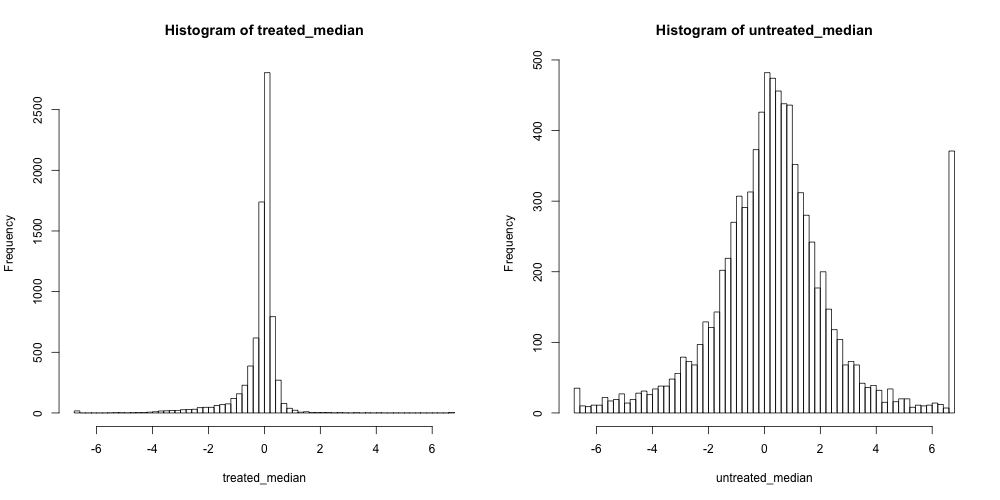

In [57]:
%%R -h 500 -w 1000
treated_median <- apply(treated_dataframe, 1, function(x) median(x, na.rm=TRUE))
untreated_median <- apply(untreated_dataframe, 1, function(x) median(x, na.rm=TRUE))
par(mfrow=c(1,2))
hist(treated_median, breaks=50)
hist(untreated_median, breaks=50)

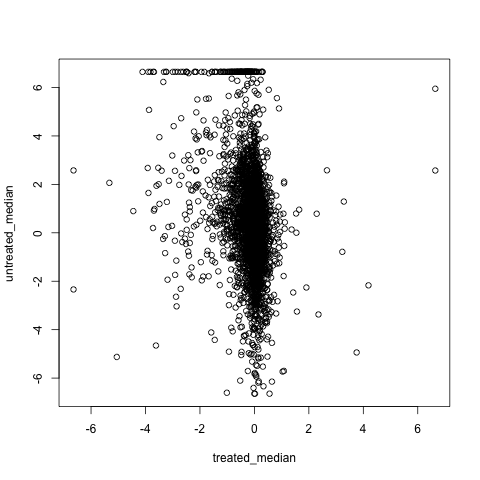

In [58]:
%%R
plot(treated_median, untreated_median)

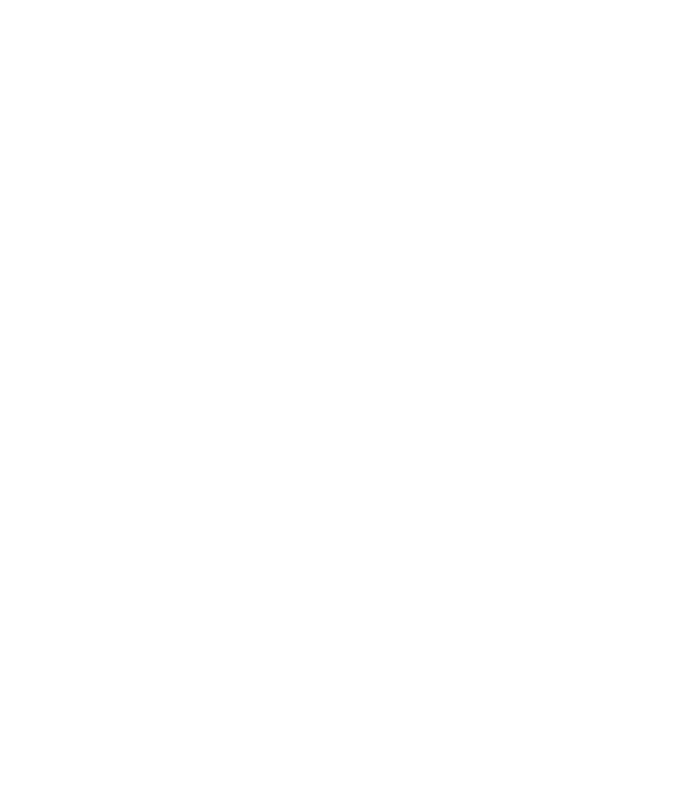

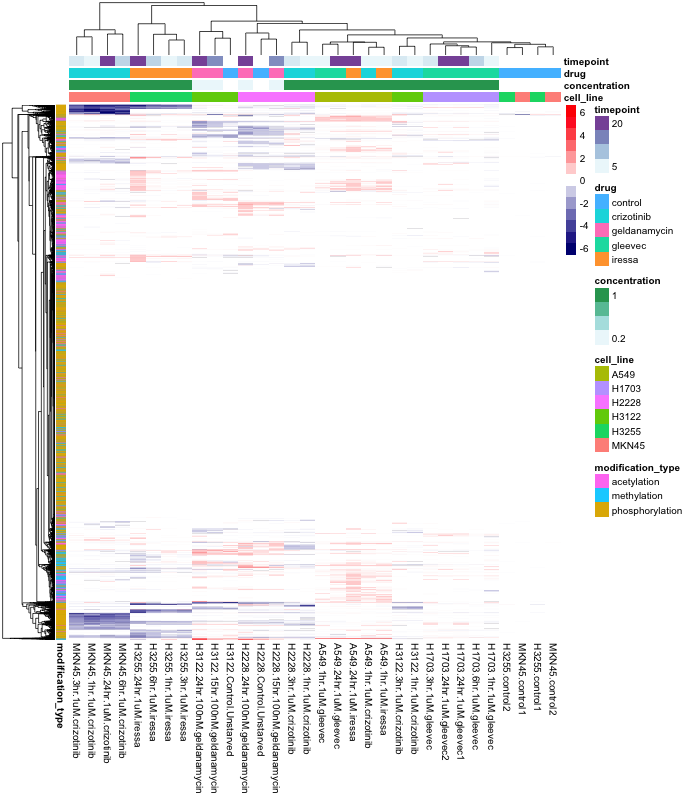

In [165]:
%%R -h 800 -w 700
top_genes <- names(sort(apply(treated_dataframe, 1, function(x) var(x, na.rm=TRUE)), decreasing=TRUE))
treated_dataframe[is.na(treated_dataframe)] <- 0
# head(treated_dataframe)
pheatmap(treated_dataframe[top_genes,],
         annotation_col = treated_metadata_dataframe,
         annotation_row = ptm_metadata_dataframe,
         show_rownames = FALSE,
         color = colorRampPalette(c('navyblue', 'white', 'red'))(13))

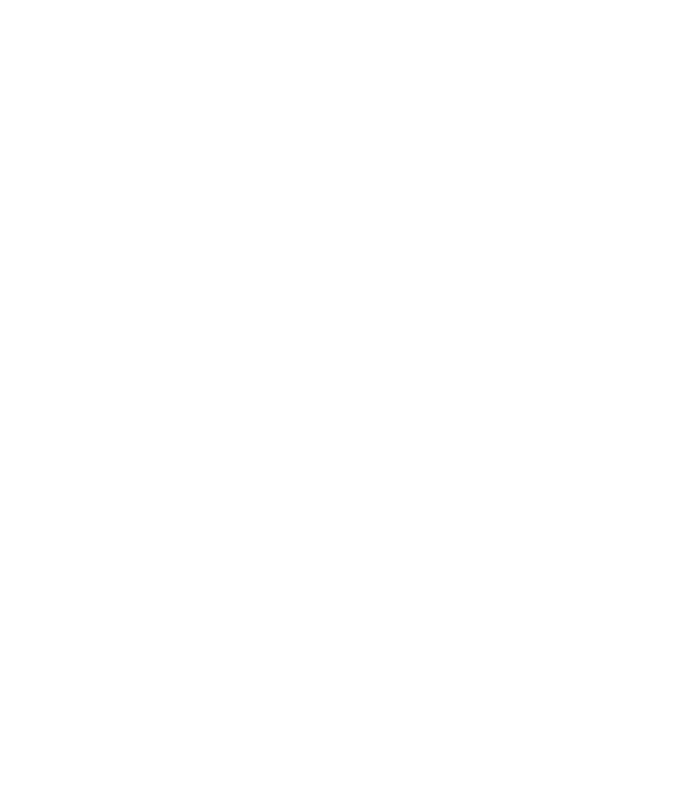

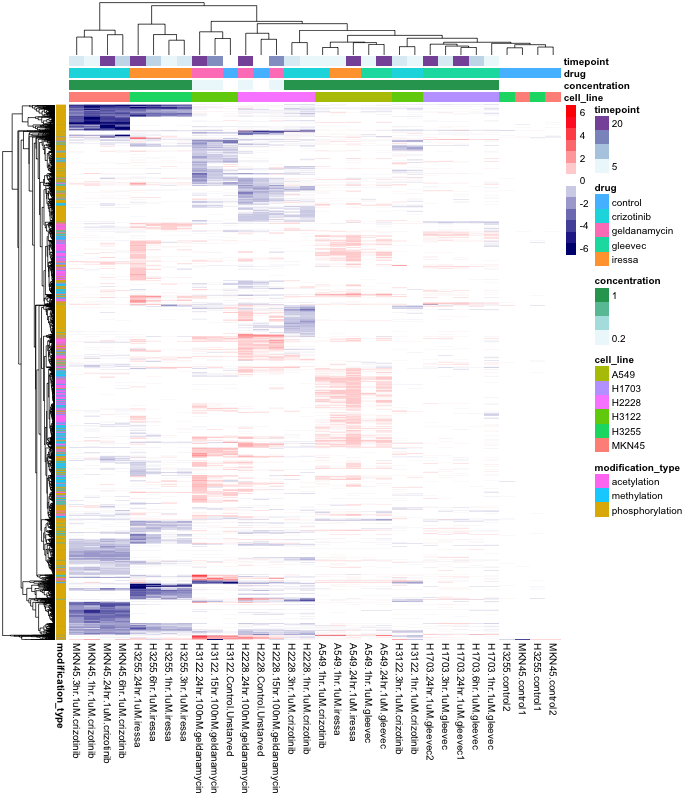

In [164]:
%%R -h 800 -w 700
top_genes <- names(sort(apply(treated_dataframe, 1, function(x) var(x, na.rm=TRUE)), decreasing=TRUE))[1:5000]
treated_dataframe[is.na(treated_dataframe)] <- 0
# head(treated_dataframe)
pheatmap(treated_dataframe[top_genes,],
         annotation_col = treated_metadata_dataframe,
         annotation_row = ptm_metadata_dataframe,
         show_rownames = FALSE,
         color = colorRampPalette(c('navyblue', 'white', 'red'))(13))

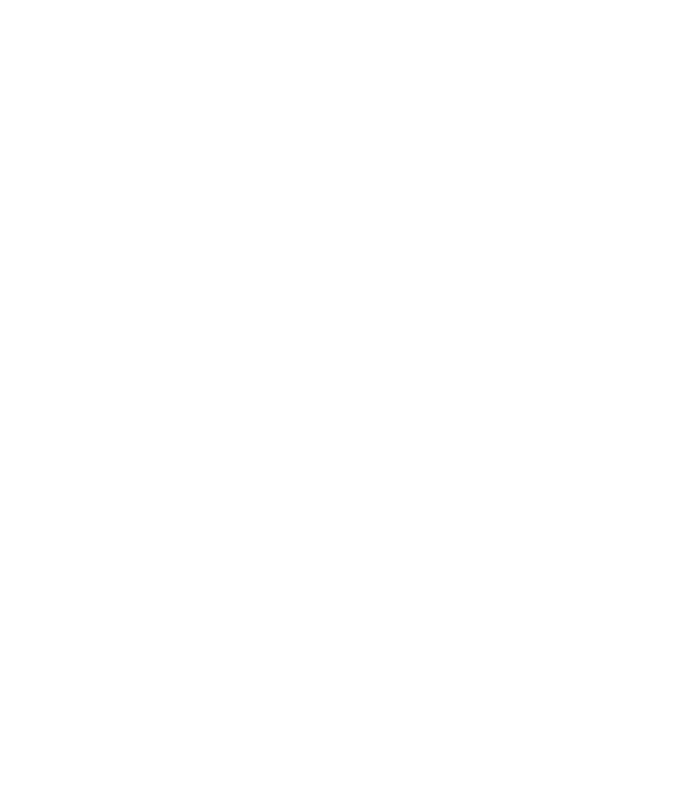

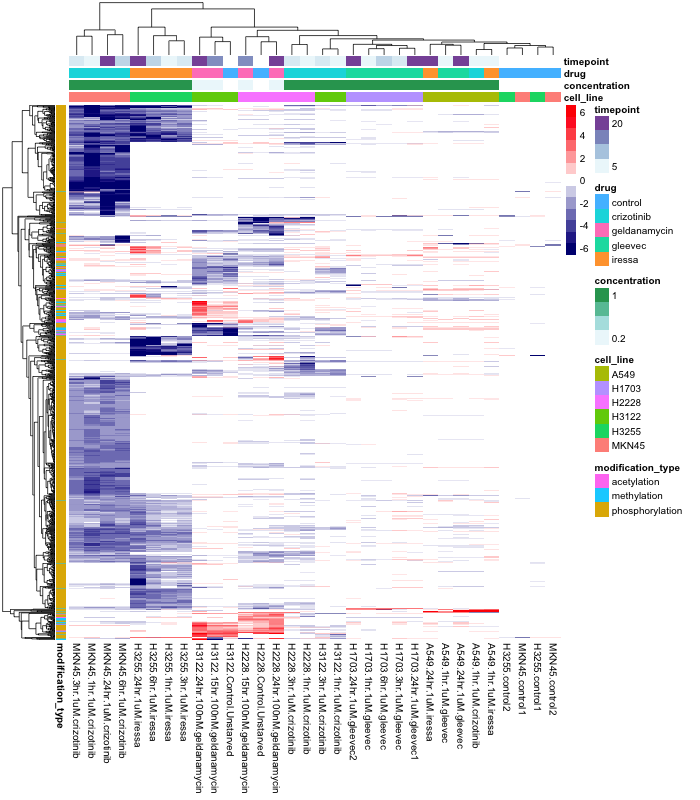

In [119]:
%%R -h 800 -w 700
top_genes <- names(sort(apply(treated_dataframe, 1, function(x) var(x, na.rm=TRUE)), decreasing=TRUE))[1:1000]
treated_dataframe[is.na(treated_dataframe)] <- 0
# head(treated_dataframe)
pheatmap(treated_dataframe[top_genes,],
         annotation_col = treated_metadata_dataframe,
         annotation_row = ptm_metadata_dataframe,
         show_rownames = FALSE,
         color = colorRampPalette(c('navyblue', 'white', 'red'))(13))

In [196]:
%%R 
head(untreated_metadata_dataframe)

[1] 127 127 127 127 127 127
Levels: 127 128 129 130 131


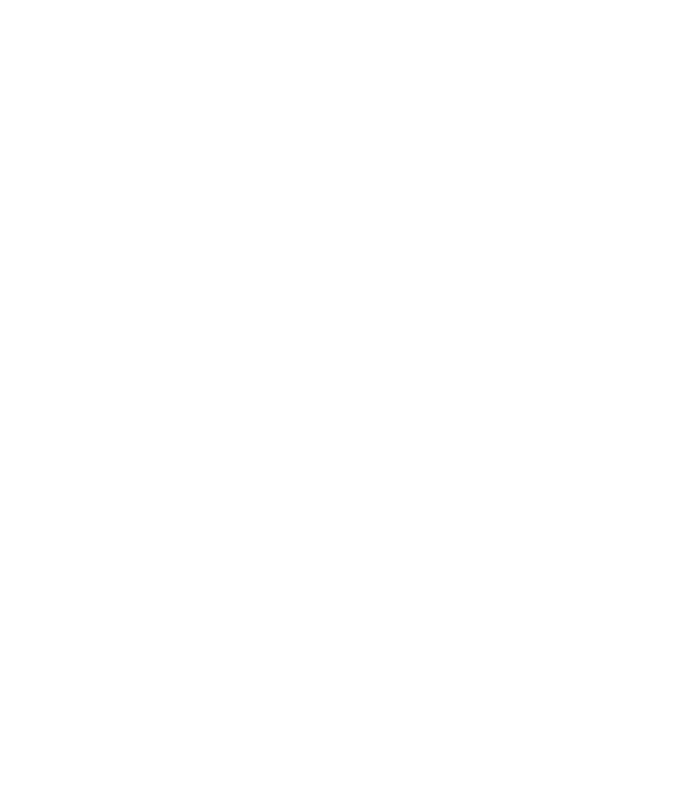

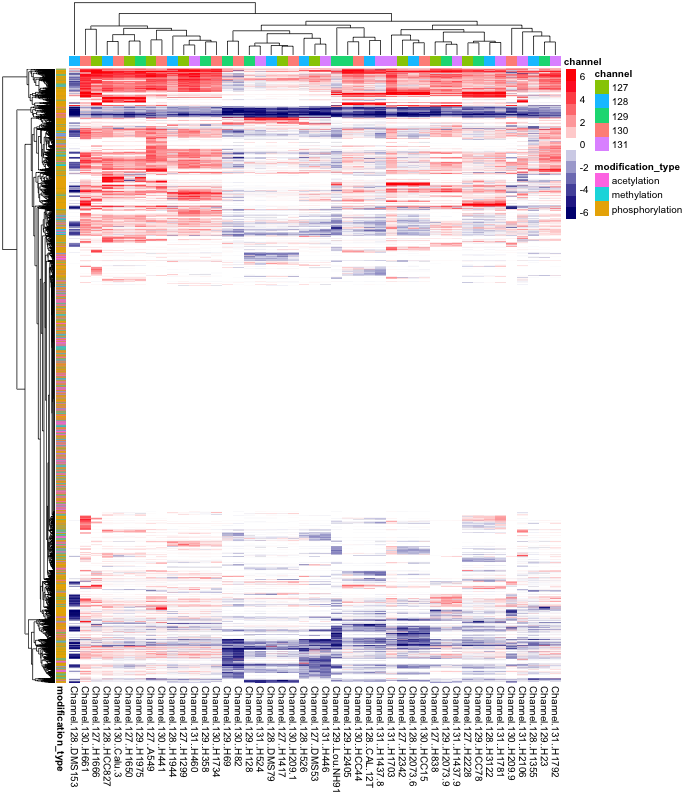

In [205]:
%%R -h 800 -w 700
top_genes <- names(sort(apply(untreated_dataframe, 1, function(x) var(x, na.rm=TRUE)), decreasing=TRUE))
untreated_dataframe[is.na(untreated_dataframe)] <- 0
# head(treated_dataframe)
pheatmap(untreated_dataframe[top_genes,],
         annotation_row = ptm_metadata_dataframe,
         annotation_col = untreated_metadata_dataframe,
         show_rownames = FALSE,
         color = colorRampPalette(c('navyblue', 'white', 'red'))(13))

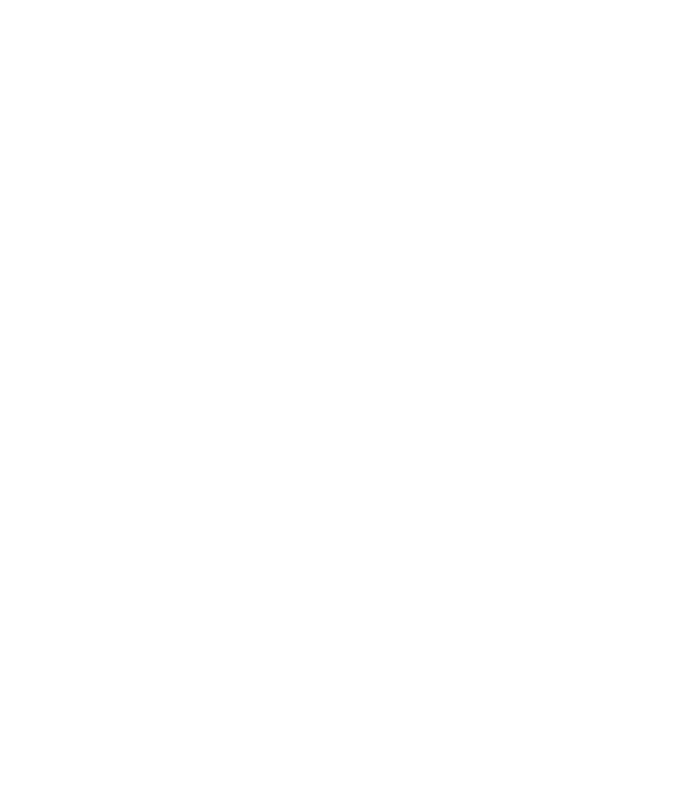

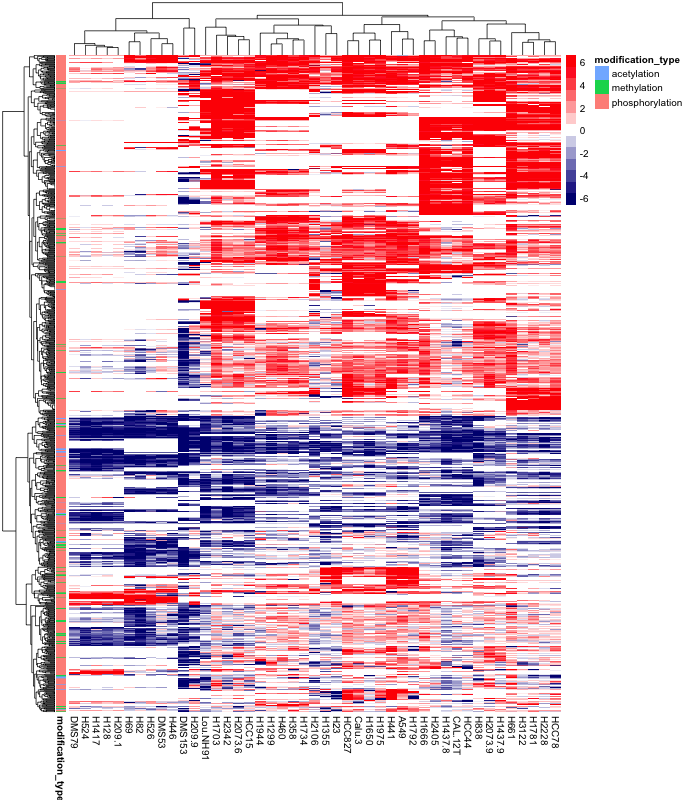

In [122]:
%%R -h 800 -w 700
top_genes <- names(sort(apply(untreated_dataframe, 1, function(x) var(x, na.rm=TRUE)), decreasing=TRUE))[1:1000]
untreated_dataframe[is.na(untreated_dataframe)] <- 0
# head(treated_dataframe)
pheatmap(untreated_dataframe[top_genes,],
         annotation_row = ptm_metadata_dataframe,
         show_rownames = FALSE,
         color = colorRampPalette(c('navyblue', 'white', 'red'))(13))

In [161]:
%R -i treated_correlation_dataframe,untreated_correlation_dataframe

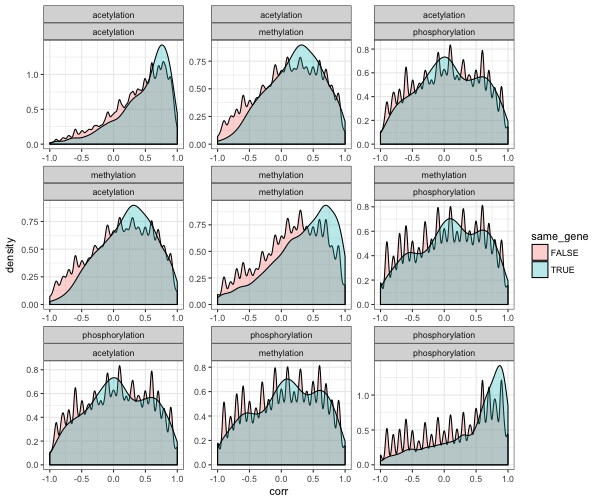

In [162]:
%%R -h 500 -w 600
ggplot(treated_correlation_dataframe, aes(x=corr, fill=same_gene)) +
    geom_density(alpha=0.3) +
    facet_wrap(source_modification_type~target_modification_type, scales='free') +
    theme_bw()

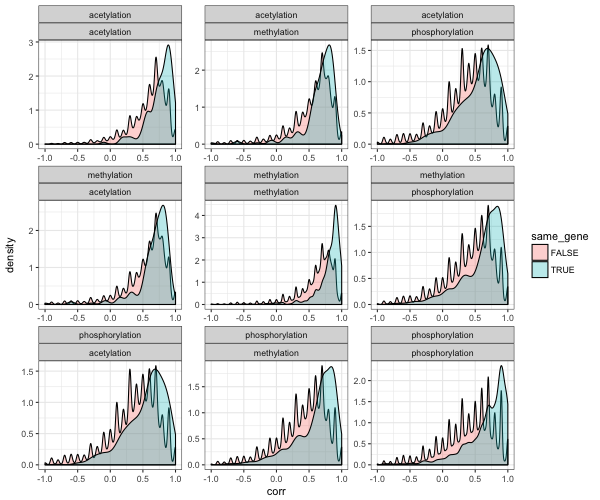

In [163]:
%%R -h 500 -w 600
ggplot(untreated_correlation_dataframe, aes(x=corr, fill=same_gene)) +
    geom_density(alpha=0.3) +
    facet_wrap(source_modification_type~target_modification_type, scales='free') +
    theme_bw()